# Pipeline Demo and Live Development

Must run in a tensorflow 2.0 container

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import math
import cv2
import sys
import os
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
# Simulate running in root
sys.path.insert(0, os.path.abspath('..'))
os.chdir("..")

## Data

In [3]:
from homologous_point_prediction.data_processing.helpers import get_leaf_dirs

In [4]:
point_directories = get_leaf_dirs("./data/")

In [5]:
example_point = point_directories[0]
example_fixed = np.load(os.path.join(example_point, "fixed.npy"))
example_moving = np.load(os.path.join(example_point, "moving.npy"))
example_fixed_point = np.load(os.path.join(example_point, "fixed_point.npy"))
example_moving_point = np.load(os.path.join(example_point, "moving_point.npy"))

In [6]:
example_moving.shape

(512, 512, 1)

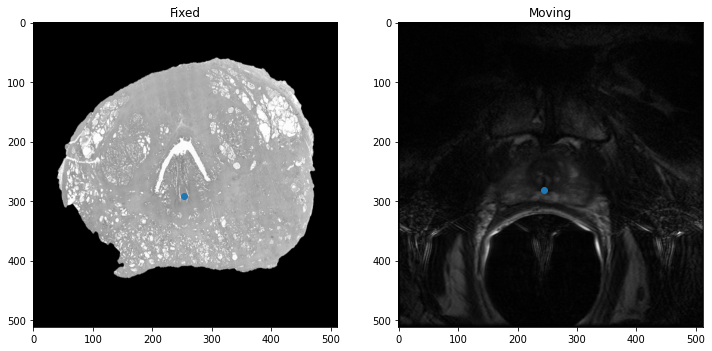

In [7]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax0.imshow(example_fixed, cmap="gray")
ax0.set_title("Fixed")
ax0.scatter([example_fixed_point[1]], [example_fixed_point[0]])
ax1.imshow(example_moving, cmap="gray")
ax1.scatter([example_moving_point[1]], [example_moving_point[0]])
ax1.set_title("Moving")
plt.show()

## Point Placement

In [8]:
from homologous_point_prediction.pipeline_components.point_placement import compute_points

In [9]:
points = np.array(compute_points(example_fixed[:,:,0] * 255, dist_thresh=25))

[4.70395412 4.36994595 5.06060906 8.70809954 7.27382398]
9.24419300135678


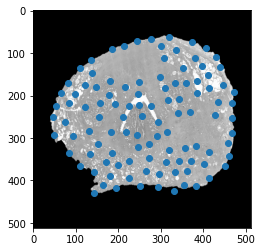

In [10]:
plt.imshow(example_fixed, cmap="gray")
plt.scatter(points[:, 1], points[:, 0])

## Active Development